In [3]:
import numpy as np
import pandas as pd

In [4]:
# Read the file in binary mode and decode with 'utf-8' encoding while ignoring errors
with open('/content/spam.csv', 'rb') as f:
    decoded_text = f.read().decode('utf-8', errors='ignore')

# Now use StringIO to convert the decoded text to a file-like object, which can be passed to pd.read_csv()
from io import StringIO
df = pd.read_csv(StringIO(decoded_text))

# Now df contains the data from the CSV file with problematic characters ignored

In [5]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
df.shape

(5572, 5)

1.DATA CLEANING     
2.EDA     
3.TEXT PREPROCESSING    
4.MODEL BUILDING    
5.EVALUATION     
6.IMPROVEMENTS DEPENDING ON EVALUATIONS   
7.WEBSITE CREATION     
8.DEPLOYMENT

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [9]:
df.head(2)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


In [10]:
#renaming the columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [11]:
df.sample(2)

,target,text
4216,ham,Will be office around 4 pm. Now i am going hos...
3018,ham,Wat time do u wan 2 meet me later?


In [12]:
#converting the target column data 'ham' and 'spam' into 1's and 0's
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [13]:
df['target']=encoder.fit_transform(df['target'])

HAM - 0
SPAM - 1

In [14]:
#missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [15]:
#check duplicated values
df.duplicated().sum()

404

In [16]:
#remove duplicates
df=df.drop_duplicates(keep='first')

In [17]:
df.shape

(5168, 2)

EXPLORATORY DATA ANALYSIS

In [18]:
#what percentage is spam and what is for ham
df['target'].value_counts()

target
0    4516
1     652
Name: count, dtype: int64

In [19]:
import matplotlib.pyplot as plt

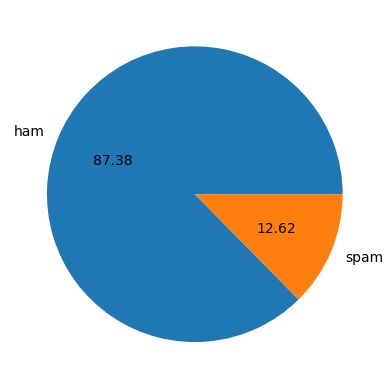

In [20]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

This is the distribution of the spam and not spam data and we can clearly see that the data distribution is imbalanced

not spam - 88%
spam - 12%

In [21]:
#we now go into deeper analysis
#we create 3 different columns
#no of alphabets in sms
#no of words in sms
#no of sentences in the sms
#for that we need a library
#nltk - natural language toolkit library

In [22]:
import nltk

In [23]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [24]:
#to count number of characters.
df['no_of_characters']=df['text'].apply(len) #gives len of characters in each row of sms

In [25]:
df.head(2)

,target,text,no_of_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29


In [26]:
#to get number of words
#we need nltk for this
#here we get list of words splitted based on spaces
df['text'].apply(lambda x:nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568      [Will, _, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: text, Length: 5168, dtype: object

In [27]:
#now we need to apply len on the tokenizer
df['no_of_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [28]:
df.head(2)

,target,text,no_of_characters,no_of_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8


In [29]:
#for number of sentences
df['text'].apply(lambda x:nltk.sent_tokenize(x))

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568               [Will _ b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: text, Length: 5168, dtype: object

In [30]:
#now we apply the len function
df['no_of_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [31]:
df.head(2)

,target,text,no_of_characters,no_of_words,no_of_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2


In [32]:
df[['no_of_characters','no_of_words','no_of_sentences']].describe()

,no_of_characters,no_of_words,no_of_sentences
count,5168.000000,5168.000000,5168.000000
mean,78.759481,18.441176,1.966331
std,58.104099,13.327587,1.449367
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,116.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


we can see that    
1.There is a sms which has max of 910 characters in it,which has 220 words and 38 sentences     
2.if we look into mean on an average 78 characters are used in each sms,18 words and roughly 2 sentences

In [33]:
#to analyze the describe function seperately on ham and spam messages
df[df['target']==0][['no_of_characters','no_of_words','no_of_sentences']].describe()

,no_of_characters,no_of_words,no_of_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.344110,17.108946,1.819973
std,56.328803,13.494730,1.383228
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [34]:
#For spam messages.
df[df['target']==1][['no_of_characters','no_of_words','no_of_sentences']].describe()

,no_of_characters,no_of_words,no_of_sentences
count,652.000000,652.000000,652.000000
mean,137.047546,27.668712,2.980061
std,29.937352,7.015283,1.491780
min,13.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,156.000000,32.000000,4.000000
max,222.000000,46.000000,9.000000


We can see that the differentiation between spam and ham messages ,
on an average spam has around 137 characters,27 words,3 sentences in each sms

whereas, in ham messages on an average there are 70 characters,17 words and 2 sentences.

We can say that in general spam messages are longer in length.

In [35]:
#Let's plot histogram to understand this.
import seaborn as sns

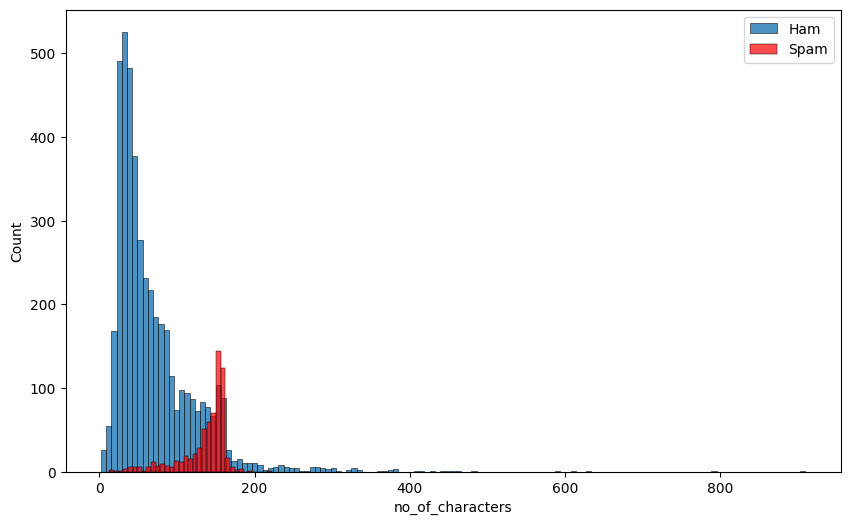

In [36]:
plt.figure(figsize=(10,6))
sns.histplot(df[df['target']==0]['no_of_characters'],alpha=0.8,label='Ham')  #ham
sns.histplot(df[df['target']==1]['no_of_characters'],color='red',alpha=0.7,label='Spam') #spam
plt.legend()
plt.show()

spam messages has no_of_characters more on an average compared to ham

maximum of the ham messages are done with less no_of_characters,

and most of the spam messages are having more no_of_characters

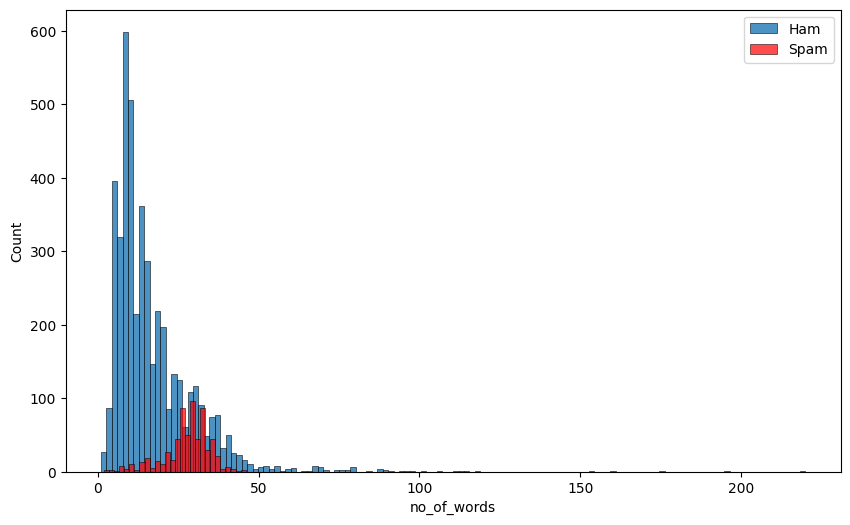

In [37]:
#we can also create this visualization for number of words
plt.figure(figsize=(10,6))
sns.histplot(df[df['target']==0]['no_of_words'],alpha=0.8,label='Ham')  #ham
sns.histplot(df[df['target']==1]['no_of_words'],color='red',alpha=0.7,label='Spam') #spam
plt.legend()
plt.show()

maximum of the ham messages are done with less no_of_words,

and most of the spam messages are having more no_of_words


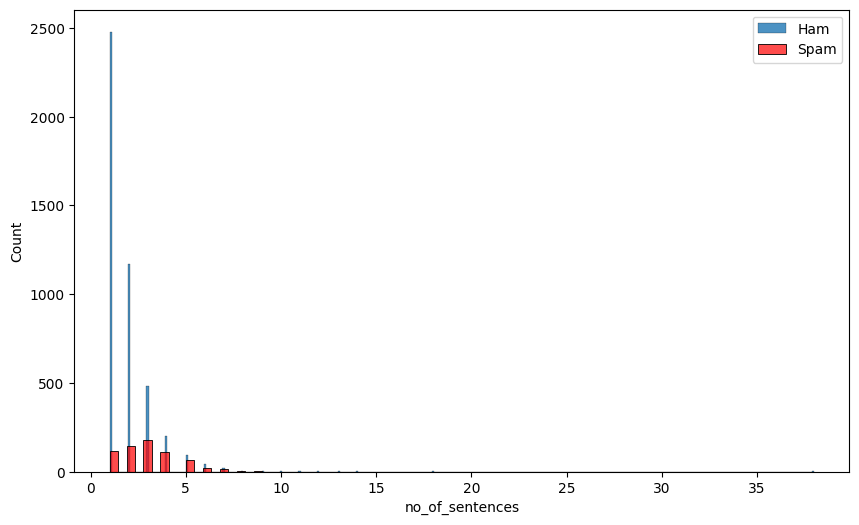

In [38]:
#we can also create this visualization for number of sentences
plt.figure(figsize=(10,6))
sns.histplot(df[df['target']==0]['no_of_sentences'],alpha=0.8,label='Ham')  #ham
sns.histplot(df[df['target']==1]['no_of_sentences'],color='red',alpha=0.7,label='Spam') #spam
plt.legend()
plt.show()

As the difference of number of sentences is just one between ham and spam the graph is almost the same

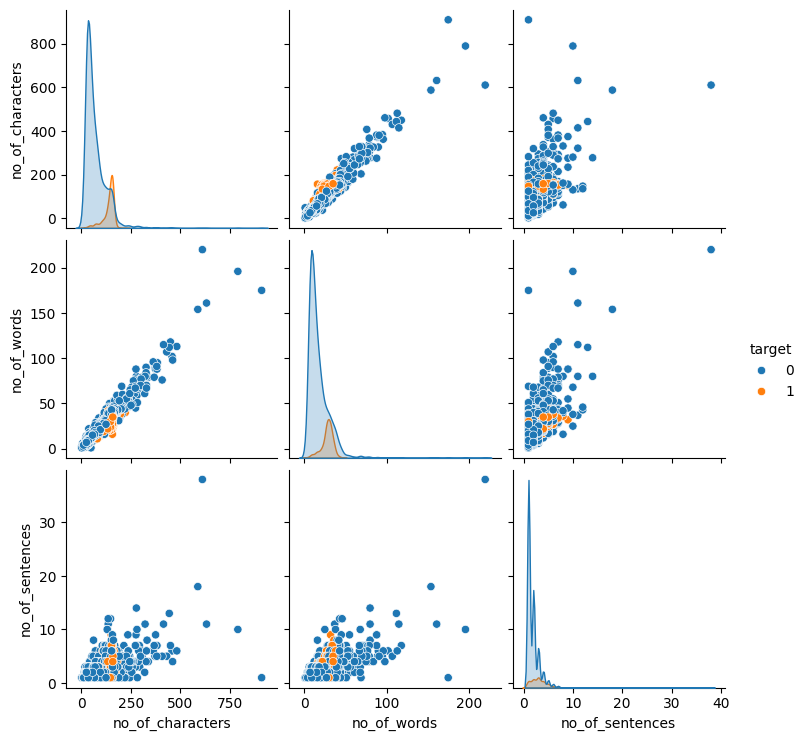

In [39]:
#we can also get insights of relation between different columns like how is no_of_characters column affecting the no_of_words column
#for this we use pairplot
sns.pairplot(df,hue='target')

We can see that there is a perfect linear relationship between no_of_characters and no_of_words

And no_of_characters and no_of_sentences is partially linearly correlated.

Similar thing for words and sentences also

But the main thing we can observe here is that our data has outliers,they will spoil our analysis.

In [40]:
df.dtypes

target               int64
text                object
no_of_characters     int64
no_of_words          int64
no_of_sentences      int64
dtype: object

correlation can be performed only on numerical rows

In [41]:
df_new = df[['target','no_of_characters','no_of_words','no_of_sentences']]

<Axes: >

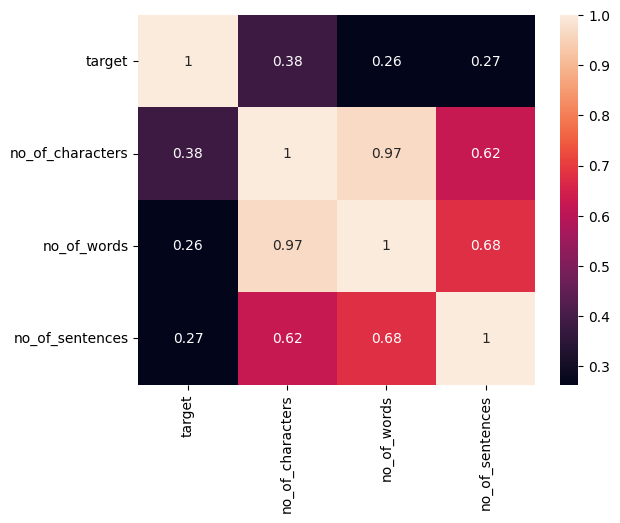

In [42]:
sns.heatmap(df_new.corr(),annot=True)

In [43]:
#dealing with outliers
# Define the function for Winsorization
def winsorize(series, lower_percentile=0.05, upper_percentile=0.95):
    lower_bound = series.quantile(lower_percentile)
    upper_bound = series.quantile(upper_percentile)
    series[series < lower_bound] = lower_bound
    series[series > upper_bound] = upper_bound
    return series

In [44]:
# Winsorize the 'no_of_characters' column in your DataFrame
df_new['no_of_characters'] = winsorize(df_new['no_of_characters'])

<ipython-input-43-888e48b1890d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series[series < lower_bound] = lower_bound
<ipython-input-43-888e48b1890d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series[series > upper_bound] = upper_bound
<ipython-input-44-7e99fcefff62>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['no_of_characters'] = winsorize(df_new['no_of_

In [45]:
# Winsorize the 'no_of_characters' column in your DataFrame
df_new['no_of_words'] = winsorize(df_new['no_of_words'])

<ipython-input-43-888e48b1890d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series[series < lower_bound] = lower_bound
<ipython-input-43-888e48b1890d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series[series > upper_bound] = upper_bound
<ipython-input-45-41b5a0f5d6d3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['no_of_words'] = winsorize(df_new['no_of_words

In [46]:
# Winsorize the 'no_of_characters' column in your DataFrame
df_new['no_of_sentences'] = winsorize(df_new['no_of_sentences'])

<ipython-input-43-888e48b1890d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series[series < lower_bound] = lower_bound
<ipython-input-43-888e48b1890d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series[series > upper_bound] = upper_bound
<ipython-input-46-c651946b249f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['no_of_sentences'] = winsorize(df_new['no_of_s

<Axes: >

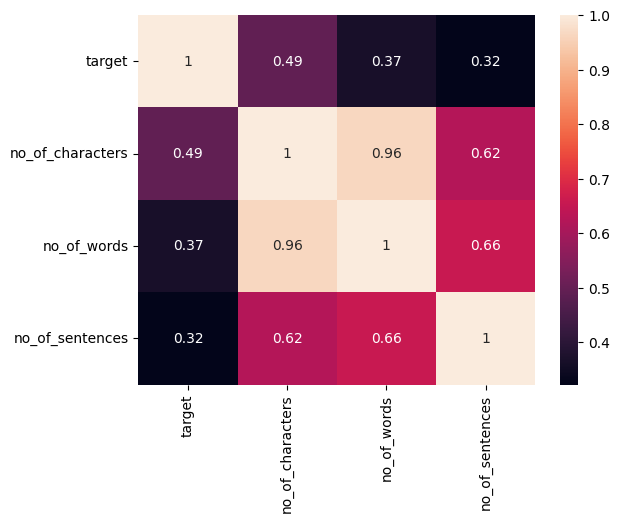

In [47]:
#to see the pearson-coefficient-correlation in heat-map
sns.heatmap(df_new.corr(),annot=True)

We can observe that the correlation between target and no_of_characters,words,sentences has been increased after dealing with the outliers.

Before:  
target , no_of_characters : 0.32

target , no_of_words : 0.26

target , no_of_sentences : 0.27

After:

target , no_of_characters : 0.49

target , no_of_words : 0.37

target , no_of_sentences : 0.32

So to get good approximations we use no_of_characters column across target as the correlation between them is much more

<h2> 3.Data Preprocessing<h2>

Lower case   
Tokenization    
Removing special characters   
Removing stop words and punctuation   
Stemming   

In [48]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [49]:
from nltk.corpus import stopwords

In [50]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [51]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [52]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [53]:
#the above are the data preprocessing techniques generally used when dealing with textual data
def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)

  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)
  text = y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)





In [54]:
line = df['text'][10]

In [55]:
transform_text(line)

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [56]:
df_new['transformed_text'] = df['text'].apply(transform_text)

In [57]:
df_new.head()

,target,no_of_characters,no_of_words,no_of_sentences,transformed_text
0,0,111,24.0,2,go jurong point crazi avail bugi n great world...
1,0,29,8.0,2,ok lar joke wif u oni
2,1,155,37.0,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,49,13.0,1,u dun say earli hor u c alreadi say
4,0,61,15.0,1,nah think goe usf live around though


Going forward we will be using the transformed_text column and the target column

Now let's build a WORDCLOUD and see what are the words that are used the most in spam and ham

In [58]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [59]:
spam_wc=wc.generate(df_new[df_new['target']==1]['transformed_text'].str.cat(sep=" "))

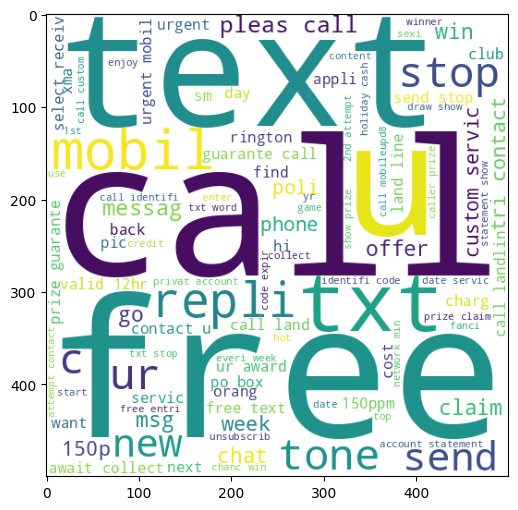

In [60]:
plt.figure(figsize=(10,6))
plt.imshow(spam_wc)

str.cat(sep=" "):
This part concatenates all the strings in the selected 'transformed_text' column into a single string. The str.cat() method concatenates strings using the specified separator, which in this case is a space ' '. So, it combines all the text from the "spam" rows into a single string, separating each text with a space.

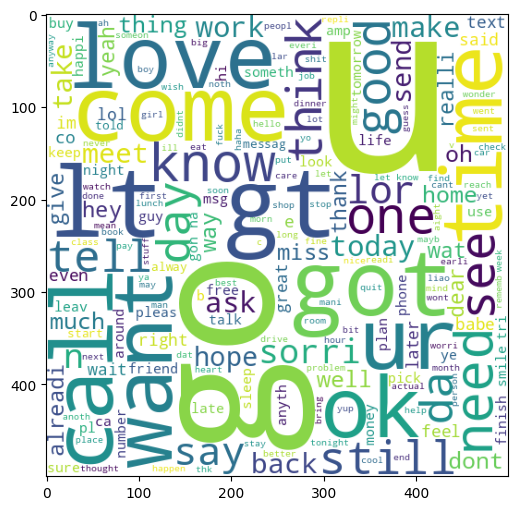

In [61]:
pam_wc=wc.generate(df_new[df_new['target']==0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(10,6))
plt.imshow(pam_wc)

We can see the most used words from the wordgenerator, but to see exact 30/50 words that are mostly used in spam or pam sms,

we can do this as below:

In [62]:
spam_corpus=[]
for msg in df_new[df_new['target']==1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)


In [63]:
len(spam_corpus) #we have 10106 words in spam messages (altogether)

10106

Counter creates a dictionary in which we will have count of each word that is occuring in spam_corpus

In [64]:
from collections import Counter
spam_word_freq=Counter(spam_corpus).most_common(30)

Now let's create a dataframe having these 30 words with their count

In [65]:
df_spam_word_freq=pd.DataFrame(Counter(spam_corpus).most_common(30),columns=['Word','Frequency'])

In [66]:
df_spam_word_freq.head(2)

,Word,Frequency
0,call,320
1,free,191


we can also visualize the count of each word

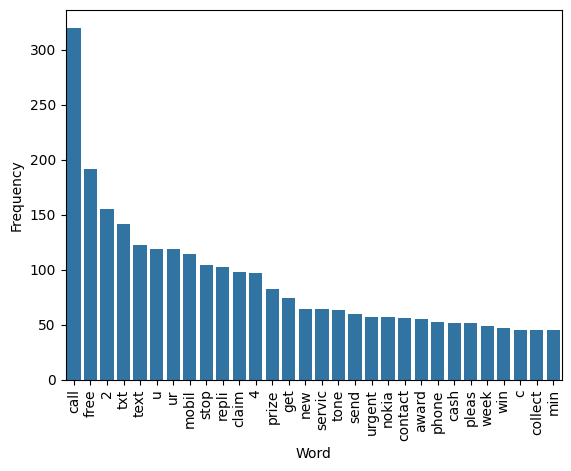

In [67]:
sns.barplot(x='Word',y='Frequency',data=df_spam_word_freq)
plt.xticks(rotation='vertical')
plt.show()

Now let's do it for pam sms

In [68]:
pam_corpus=[]
for msg in df_new[df_new['target']==0]['transformed_text'].tolist():
  for word in msg.split():
    pam_corpus.append(word)

In [69]:
len(pam_corpus)

35380

In [70]:
df_pam_word_freq=pd.DataFrame(Counter(pam_corpus).most_common(30),columns=['Word','Frequency'])

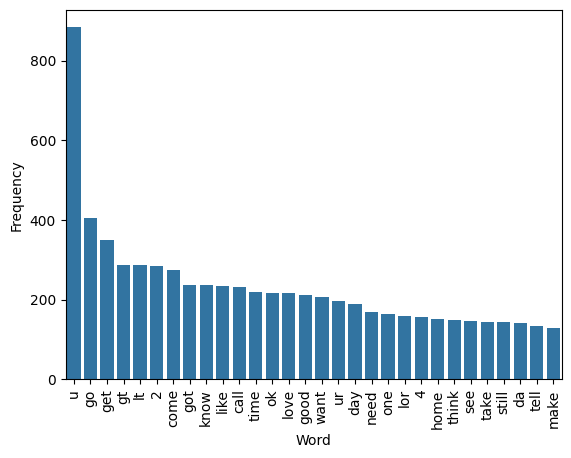

In [71]:
sns.barplot(x='Word',y='Frequency',data=df_pam_word_freq)
plt.xticks(rotation='vertical')
plt.show()

<h2>4.Model Building<h2>

We are building Naive Bayes model as we are dealing with textual data

Generally, Naive Bayes gives best results on textual data

We always input numerical values into the algorithms,but here the input is transformed_text column which is not in numerical state.
so first we convert the transformed_text column into numeric

That is, we convert text into Vectors (Vectorizing) - BoW (Bag of Words)

In [72]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [73]:
X = cv.fit_transform(df_new['transformed_text']).toarray()
X.shape

(5168, 6704)

In [74]:
y = df['target'].values
y.shape

(5168,)

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

We don't know which variant would work better, so we are looking into all 3

In [77]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [78]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [79]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8829787234042553
[[792 101]
 [ 20 121]]
0.545045045045045


The accuracy score indicates that your model achieves an accuracy of approximately 88.30%. This means that around 88.30% of the predictions made by your model are correct.

True Positive (TP): 121
False Positive (FP): 101
True Negative (TN): 792
False Negative (FN): 20

From the confusion matrix, we can observe that your model correctly predicts 121 instances of class 1 (spam) and 792 instances of class 0 (non-spam). However, it incorrectly predicts 101 instances of class 0 as class 1 (false positives), and 20 instances of class 1 as class 0 (false negatives).

The precision score for class 1 (spam) is approximately 54.50%. Precision measures the proportion of correctly predicted positive cases out of all cases predicted as positive. In this case, it indicates that around 54.50% of the messages predicted as spam by your model are actually spam.

Overall, your model achieves a relatively high accuracy score, indicating good overall performance. However, it's important to consider other metrics, such as precision and recall, especially in imbalanced datasets like spam detection, where the number of spam messages may be significantly lower than non-spam messages. In this case, the precision score for class 1 (spam) is moderate, suggesting that there is room for improvement, particularly in reducing false positives.

In [80]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9632495164410058
[[868  25]
 [ 13 128]]
0.8366013071895425


Here the accuracy is great as it is 96%, but the precision score is 83.6% there is still room for improvement, as the data is imbalanced, accuracy_score is not that important, but high precision score is necessary.

In [81]:
bnb.fit(X_train,y_train)
y_pred2=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.965183752417795
[[890   3]
 [ 33 108]]
0.972972972972973


This variant is great, as the precision_score is 97% and accuracy_score is also better than previous variant 96.5%.

SO BNB (Bernoulli Naive Bayes) is working best so far.

NOW, INSTEAD OF BoW LET'S USE TF-IDF
AND SEE IF THERE IS ANY IMPROVEMENT

In [82]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [83]:
X = tfidf.fit_transform(df_new['transformed_text']).toarray()
X.shape

(5168, 6704)

In [84]:
y=df_new['target'].values
y.shape

(5168,)

In [85]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [86]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8771760154738878
[[792 101]
 [ 26 115]]
0.5324074074074074


Not much of a difference, infact precision_score reduced with tfidf here

In [87]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9535783365570599
[[893   0]
 [ 48  93]]
1.0


Here,the accuracy_score reduced a litle bit but if we look at the precision_score it is equal to 1 indicating there are no false positives (which is what we wanted)

In [88]:
bnb.fit(X_train,y_train)
y_pred2=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.965183752417795
[[890   3]
 [ 33 108]]
0.972972972972973


No change in bnb

So, we now have 2 options, we can either go with MNB or BNB. The accuracy in BNB is more than MNB.And precision_score is more in MNB comparitively

But precision_score matters the most here, so we are going forward with MNB (Multinomial Naive Bayes with TFIDF) as the data is imbalanced accuracy_score is not a reliable measure

NOW LET'S COMPARE NAIVE BAYES MNB ALGORITHM RESULTS WITH OTHER MACHINE LEARNING CLASSIFICATION ALGORITHMS.

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [90]:
svc = SVC(kernel='sigmoid',gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear',penalty='l1')
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
bc = BaggingClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [91]:
clfs = {
    'SVC':svc,
    'KN':knc,
    'NB':mnb,
    'DT':dtc,
    'LR':lrc,
    'RF':rfc,
    'AdaBoost':abc,
    'Bgc':bc,
    'ETC':etc,
    'GBDT':gbdt,
    'XGB':xgb
}

In [92]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  precision = precision_score(y_test,y_pred)

  return accuracy,precision

In [93]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9748549323017408, 0.9831932773109243)

In [94]:
accuracy_scores=[]
precision_scores=[]

for name,clf in clfs.items():
  current_accuracy,current_precision = train_classifier(clf,X_train,y_train,X_test,y_test)

  print("For : ",name)
  print("Accuracy - ",current_accuracy)
  print("Precision - ",current_precision)

  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

For :  SVC
Accuracy -  0.9748549323017408
Precision -  0.9831932773109243
For :  KN
Accuracy -  0.8945841392649904
Precision -  1.0
For :  NB
Accuracy -  0.9535783365570599
Precision -  1.0
For :  DT
Accuracy -  0.9323017408123792
Precision -  0.8736842105263158
For :  LR
Accuracy -  0.9516441005802708
Precision -  0.9504950495049505
For :  RF
Accuracy -  0.9709864603481625
Precision -  0.9911504424778761
For :  AdaBoost
Accuracy -  0.9642166344294004
Precision -  0.9262295081967213
For :  Bgc
Accuracy -  0.9584139264990329
Precision -  0.8769230769230769
For :  ETC
Accuracy -  0.9748549323017408
Precision -  1.0
For :  GBDT
Accuracy -  0.9468085106382979
Precision -  0.8981481481481481
For :  XGB
Accuracy -  0.9680851063829787
Precision -  0.95


In [95]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.894584,1.000000
2,NB,0.953578,1.000000
8,ETC,0.974855,1.000000
5,RF,0.970986,0.991150
0,SVC,0.974855,0.983193
4,LR,0.951644,0.950495
10,XGB,0.968085,0.950000
6,AdaBoost,0.964217,0.926230
9,GBDT,0.946809,0.898148
7,Bgc,0.958414,0.876923


In [96]:
performance_df1 = pd.melt(performance_df,id_vars='Algorithm')
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.894584
1,NB,Accuracy,0.953578
2,ETC,Accuracy,0.974855
3,RF,Accuracy,0.970986
4,SVC,Accuracy,0.974855
5,LR,Accuracy,0.951644
6,XGB,Accuracy,0.968085
7,AdaBoost,Accuracy,0.964217
8,GBDT,Accuracy,0.946809
9,Bgc,Accuracy,0.958414


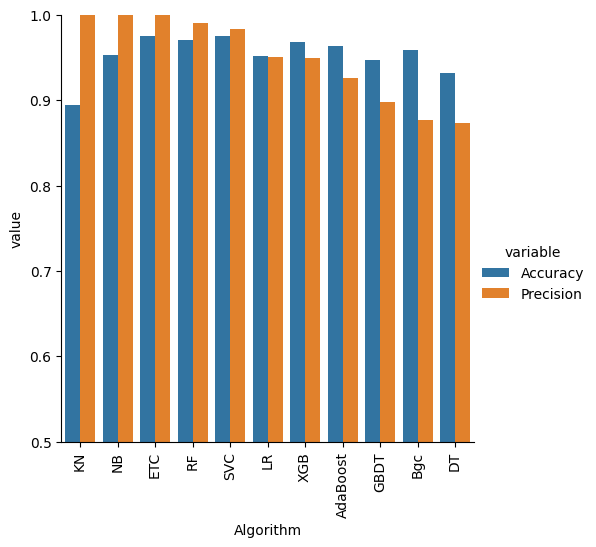

In [97]:
sns.catplot(x='Algorithm',y='value',hue='variable',data=performance_df1,kind='bar',height=5)
plt.ylim(0.5,1.0) # as no value is less than 0.5 and more than 1.0
plt.xticks(rotation='vertical')
plt.show()

Now Let's try and improve our model.

We now use max_features parameter in TFIDF.
Instead of using all the words,let's just use 3000 most used words.

3000 gave best results compared to 1000,2000

In [98]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [99]:
X = tfidf.fit_transform(df_new['transformed_text']).toarray()
X.shape

(5168, 3000)

In [100]:
y=df_new['target'].values
y.shape

(5168,)

In [101]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [102]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8752417794970987
[[791 102]
 [ 27 114]]
0.5277777777777778


Before :

Accuracy -0.8771760154738878      
Precision -0.5324074074074074

Slight improvement is observed

In [103]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9700193423597679
[[893   0]
 [ 31 110]]
1.0


Before :

Accuracy -0.9535783365570599    
Precision -1.0

Accuracy improvement is observed

In [104]:
bnb.fit(X_train,y_train)
y_pred2=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9796905222437138
[[892   1]
 [ 20 121]]
0.9918032786885246


Before :

Accuracy -0.965183752417795  
Precision -0.972972972972973

We can see that both accuracy and precision improved

In [105]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  precision = precision_score(y_test,y_pred)

  return accuracy,precision

In [106]:
accuracy_scores=[]
precision_scores=[]

for name,clf in clfs.items():
  current_accuracy,current_precision = train_classifier(clf,X_train,y_train,X_test,y_test)

  print("For : ",name)
  print("Accuracy - ",current_accuracy)
  print("Precision - ",current_precision)

  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

For :  SVC
Accuracy -  0.97678916827853
Precision -  0.9834710743801653
For :  KN
Accuracy -  0.9013539651837524
Precision -  1.0
For :  NB
Accuracy -  0.9700193423597679
Precision -  1.0
For :  DT
Accuracy -  0.9294003868471954
Precision -  0.8695652173913043
For :  LR
Accuracy -  0.9555125725338491
Precision -  0.9611650485436893
For :  RF
Accuracy -  0.9671179883945842
Precision -  0.9908256880733946
For :  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9464285714285714
For :  Bgc
Accuracy -  0.960348162475822
Precision -  0.8787878787878788
For :  ETC
Accuracy -  0.971953578336557
Precision -  0.9745762711864406
For :  GBDT
Accuracy -  0.9477756286266924
Precision -  0.9393939393939394
For :  XGB
Accuracy -  0.9680851063829787
Precision -  0.9655172413793104


In [107]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)
temp_df

,Algorithm,Accuracy_max_ft_3000,Precision_max_ft_3000
1,KN,0.901354,1.000000
2,NB,0.970019,1.000000
5,RF,0.967118,0.990826
0,SVC,0.976789,0.983471
8,ETC,0.971954,0.974576
10,XGB,0.968085,0.965517
4,LR,0.955513,0.961165
6,AdaBoost,0.960348,0.946429
9,GBDT,0.947776,0.939394
7,Bgc,0.960348,0.878788


In [108]:
performance_df.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,KN,0.894584,1.000000,0.901354,1.000000
1,NB,0.953578,1.000000,0.970019,1.000000
2,ETC,0.974855,1.000000,0.971954,0.974576
3,RF,0.970986,0.991150,0.967118,0.990826
4,SVC,0.974855,0.983193,0.976789,0.983471
5,LR,0.951644,0.950495,0.955513,0.961165
6,XGB,0.968085,0.950000,0.968085,0.965517
7,AdaBoost,0.964217,0.926230,0.960348,0.946429
8,GBDT,0.946809,0.898148,0.947776,0.939394
9,Bgc,0.958414,0.876923,0.960348,0.878788


We can observe that Multinomial Naive Bayes works as the best fit

Now let's again try to improve the performance of the model.

This time let's scale the X parameters.

We are using this instead of StandardScaler because SS gives negative values which naive bayes cannot accept

Scaling is done to get the values into a particular range  [0,1]

In [109]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [110]:
X = tfidf.fit_transform(df_new['transformed_text']).toarray()

In [111]:
X=scaler.fit_transform(X)

In [112]:
y=df_new['target'].values


In [113]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [114]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  precision = precision_score(y_test,y_pred)

  return accuracy,precision

In [115]:
accuracy_scores=[]
precision_scores=[]

for name,clf in clfs.items():
  current_accuracy,current_precision = train_classifier(clf,X_train,y_train,X_test,y_test)

  print("For : ",name)
  print("Accuracy - ",current_accuracy)
  print("Precision - ",current_precision)

  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

For :  SVC
Accuracy -  0.971953578336557
Precision -  0.9590163934426229
For :  KN
Accuracy -  0.9003868471953579
Precision -  1.0
For :  NB
Accuracy -  0.9816247582205029
Precision -  0.9765625
For :  DT
Accuracy -  0.9284332688588007
Precision -  0.8602150537634409
For :  LR
Accuracy -  0.965183752417795
Precision -  0.9646017699115044
For :  RF
Accuracy -  0.9671179883945842
Precision -  0.9908256880733946
For :  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9464285714285714
For :  Bgc
Accuracy -  0.960348162475822
Precision -  0.8787878787878788
For :  ETC
Accuracy -  0.971953578336557
Precision -  0.9745762711864406
For :  GBDT
Accuracy -  0.9477756286266924
Precision -  0.9393939393939394
For :  XGB
Accuracy -  0.9680851063829787
Precision -  0.9655172413793104


In [116]:
new_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000_scaler':accuracy_scores,'Precision_max_ft_3000_scaler':precision_scores}).sort_values('Precision_max_ft_3000_scaler',ascending=False)
new_df

,Algorithm,Accuracy_max_ft_3000_scaler,Precision_max_ft_3000_scaler
1,KN,0.900387,1.000000
5,RF,0.967118,0.990826
2,NB,0.981625,0.976562
8,ETC,0.971954,0.974576
10,XGB,0.968085,0.965517
4,LR,0.965184,0.964602
0,SVC,0.971954,0.959016
6,AdaBoost,0.960348,0.946429
9,GBDT,0.947776,0.939394
7,Bgc,0.960348,0.878788


In [117]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')
new_df_scaled

,Algorithm,Accuracy_max_ft_3000_scaler,Precision_max_ft_3000_scaler,Accuracy_max_ft_3000,Precision_max_ft_3000
0,KN,0.900387,1.000000,0.901354,1.000000
1,RF,0.967118,0.990826,0.967118,0.990826
2,NB,0.981625,0.976562,0.970019,1.000000
3,ETC,0.971954,0.974576,0.971954,0.974576
4,XGB,0.968085,0.965517,0.968085,0.965517
5,LR,0.965184,0.964602,0.955513,0.961165
6,SVC,0.971954,0.959016,0.976789,0.983471
7,AdaBoost,0.960348,0.946429,0.960348,0.946429
8,GBDT,0.947776,0.939394,0.947776,0.939394
9,Bgc,0.960348,0.878788,0.960348,0.878788


We can observe that there is not much difference or change in precision but if we observe the accuracy of models is reducing.So the results are better off without Scaling.

Also, their is no improvement in the model if we are adding more columns to X like no_of_characters,no_of_words,no_of_sentences.

Up until now the best results that we got are from model after considering max_features in tfidf.

Now let's try using VOTING CLASSIFIER by giving our best models as input.

And see if
precision =1.0
and Accuracy>97.0019

In [118]:
#voting classifier
from sklearn.ensemble import VotingClassifier

In [119]:
voting = VotingClassifier(estimators=[('kn',knc),('nb',mnb),('et',etc)],voting='soft')

In [120]:
#not considering scaler fit
X1 = tfidf.fit_transform(df_new['transformed_text']).toarray()

In [121]:
X_train,X_test,y_train,y_test = train_test_split(X1,y,test_size=0.2,random_state=2)

In [122]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('kn', KNeighborsClassifier()),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [123]:
y_pred = voting.predict(X_test)
print("Accuracy : ",accuracy_score(y_test,y_pred))
print("Precision : ",precision_score(y_test,y_pred))

Accuracy :  0.9555125725338491
Precision :  1.0


Precision is the same but the accuracy has decreased.

So mnb model alone is best when compared to voting classifier.

So,the best model is MULTINOMIAL NAIVE BAYES with ACCURACY : 97.0019 and PRECISION : 1.0

As the model is decided , let's create a pipeline and then convert it into a WEBSITE

Whenever you recieve a new Email the first step would be  
1. Transforming the text
2. Vectorizing
3. Applying the Algorithm

So, we are using pickle on 2 files,

In [124]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))#wb-write binary
pickle.dump(mnb,open('model.pkl','wb'))

Now after getting these two files, we create a project in pycharm